# GSE87631 - Kirschner
## Xiaonan Wang
## 24May2023

In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns
import smqpp

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
print(smqpp.__version__)

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.1 statsmodels==0.13.1 python-igraph==0.9.8 louvain==0.7.1 pynndescent==0.5.5
0.1.2


# Read in and tidyup

In [2]:
meta = pd.read_csv('./Data/GSE87631_series_matrix.txt', skiprows=27, sep="\t", header=None, index_col=0)

In [3]:
meta1 = meta.loc[['!Sample_title', '!Sample_geo_accession','!Sample_description','!Sample_characteristics_ch1'],:].copy().T

In [4]:
meta1.head()

,!Sample_title,!Sample_geo_accession,!Sample_description,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1
1,SLX-9772.N701_N502,GSM2336016,Old HSC JAK2 HOM,tissue: whole bone marrow,cell type: Hematopoietic Stem Cell,age: 18 Months (Old),genotype: JAK2 V617F Homozygous
2,SLX-9772.N701_N503,GSM2336017,Old HSC JAK2 HOM,tissue: whole bone marrow,cell type: Hematopoietic Stem Cell,age: 18 Months (Old),genotype: JAK2 V617F Homozygous
3,SLX-9772.N701_N504,GSM2336018,Old HSC JAK2 HOM,tissue: whole bone marrow,cell type: Hematopoietic Stem Cell,age: 18 Months (Old),genotype: JAK2 V617F Homozygous
4,SLX-9772.N701_N505,GSM2336019,Old HSC JAK2 HOM,tissue: whole bone marrow,cell type: Hematopoietic Stem Cell,age: 18 Months (Old),genotype: JAK2 V617F Homozygous
5,SLX-9772.N701_N506,GSM2336020,Old HSC JAK2 HOM,tissue: whole bone marrow,cell type: Hematopoietic Stem Cell,age: 18 Months (Old),genotype: JAK2 V617F Homozygous


In [5]:
meta1.columns = ['SLX', 'GSM', 'Condition', 'tissue', 'cell_type', 'age', 'genotype']

In [6]:
meta1.shape

(1152, 7)

In [7]:
meta1 = meta1.set_index('SLX')

In [8]:
meta1.head()

,GSM,Condition,tissue,cell_type,age,genotype
SLX,,,,,,
SLX-9772.N701_N502,GSM2336016,Old HSC JAK2 HOM,tissue: whole bone marrow,cell type: Hematopoietic Stem Cell,age: 18 Months (Old),genotype: JAK2 V617F Homozygous
SLX-9772.N701_N503,GSM2336017,Old HSC JAK2 HOM,tissue: whole bone marrow,cell type: Hematopoietic Stem Cell,age: 18 Months (Old),genotype: JAK2 V617F Homozygous
SLX-9772.N701_N504,GSM2336018,Old HSC JAK2 HOM,tissue: whole bone marrow,cell type: Hematopoietic Stem Cell,age: 18 Months (Old),genotype: JAK2 V617F Homozygous
SLX-9772.N701_N505,GSM2336019,Old HSC JAK2 HOM,tissue: whole bone marrow,cell type: Hematopoietic Stem Cell,age: 18 Months (Old),genotype: JAK2 V617F Homozygous
SLX-9772.N701_N506,GSM2336020,Old HSC JAK2 HOM,tissue: whole bone marrow,cell type: Hematopoietic Stem Cell,age: 18 Months (Old),genotype: JAK2 V617F Homozygous


In [10]:
GSE87631 = sc.read('./Data/GSE87631.txt').T

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [11]:
GSE87631.shape

(1152, 41485)

In [12]:
GSE87631.obs.head()

""
SLX-13212.N701_N502
SLX-13212.N701_N503
SLX-13212.N701_N504
SLX-13212.N701_N505
SLX-13212.N701_N506


In [13]:
GSE87631.obs = pd.concat([GSE87631.obs, meta1], axis=1)

In [14]:
GSE87631.obs.head()

,GSM,Condition,tissue,cell_type,age,genotype
SLX-13212.N701_N502,GSM2587704,12 Months HSC JAK2 HOM,tissue: whole bone marrow,cell type: Hematopoietic Stem Cell,age: 12 Months,genotype: JAK2 V617F Homozygous
SLX-13212.N701_N503,GSM2587705,12 Months HSC JAK2 HOM,tissue: whole bone marrow,cell type: Hematopoietic Stem Cell,age: 12 Months,genotype: JAK2 V617F Homozygous
SLX-13212.N701_N504,GSM2587706,12 Months HSC JAK2 HOM,tissue: whole bone marrow,cell type: Hematopoietic Stem Cell,age: 12 Months,genotype: JAK2 V617F Homozygous
SLX-13212.N701_N505,GSM2587707,12 Months HSC JAK2 HOM,tissue: whole bone marrow,cell type: Hematopoietic Stem Cell,age: 12 Months,genotype: JAK2 V617F Homozygous
SLX-13212.N701_N506,GSM2587708,12 Months HSC JAK2 HOM,tissue: whole bone marrow,cell type: Hematopoietic Stem Cell,age: 12 Months,genotype: JAK2 V617F Homozygous


In [15]:
GSE87631.obs['age'].value_counts()

age: 12 Months           384
age: 18 Months (Old)     384
age: 4 Months (young)    384
Name: age, dtype: int64

In [17]:
geneInfo = pd.read_csv('./Data/GSE87631_gene_anno.txt', sep="\t", header=None, index_col=0)

In [18]:
geneInfo.shape

(41388, 1)

In [19]:
idx = [True if ('__' in str(x)) or ('ERCC' in str(x)) else False for x in GSE87631.var_names]

In [20]:
GSE87631 = GSE87631[:,~np.array(idx)].copy()

In [21]:
GSE87631.shape

(1152, 41388)

In [22]:
geneInfo.index = [str(x) for x in geneInfo.index]

In [23]:
geneInfo.head()

,1
ENSMUSG00000090025,Gm16088
ENSMUSG00000064842,Gm26206
ENSMUSG00000051951,Xkr4
ENSMUSG00000089699,Gm1992
ENSMUSG00000088333,Gm27396


In [24]:
GNOL = np.intersect1d(GSE87631.var_names, geneInfo.index)

In [25]:
len(GNOL)

41382

In [26]:
GSE87631 = GSE87631[:, GNOL].copy()

In [27]:
geneInfo = geneInfo.loc[GNOL,:].copy()

In [28]:
GSE87631.var['En'] = GSE87631.var_names

In [29]:
GSE87631.var_names = geneInfo[1]

In [30]:
GSE87631.var.head()

,En
Gnai3,ENSMUSG00000000001
Pbsn,ENSMUSG00000000003
Cdc45,ENSMUSG00000000028
H19,ENSMUSG00000000031
Scml2,ENSMUSG00000000037


# QC

In [31]:
GSE87631.var['mt'] = GSE87631.var_names.str.startswith('mt-') 

In [32]:
sc.pp.calculate_qc_metrics(GSE87631, qc_vars=['mt'], inplace=True)

In [33]:
import seaborn as sns

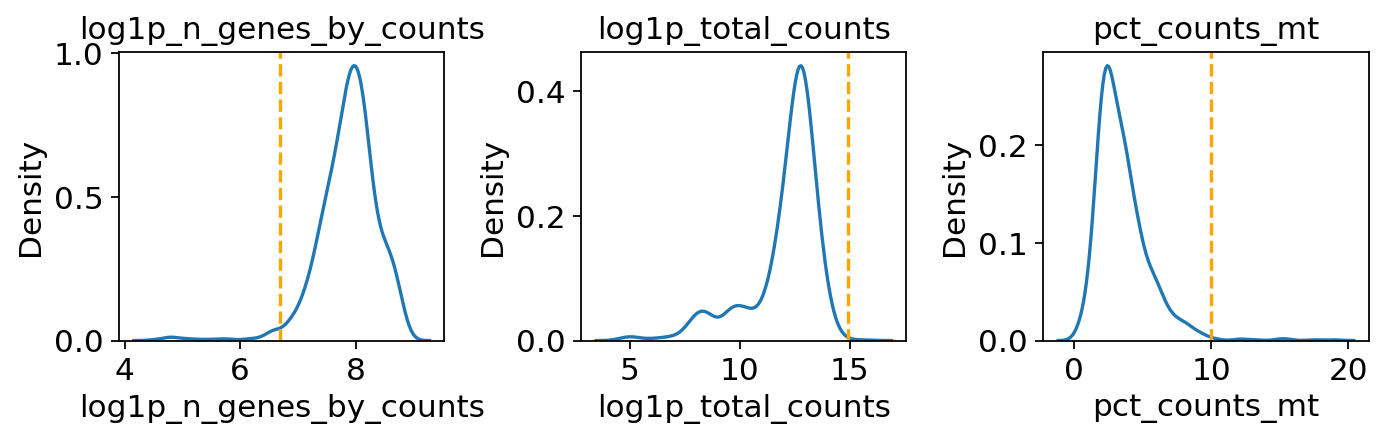

In [34]:
obs_terms = ['log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_mt']
cutoffs = [800,3000000, np.exp(10)]
fig,ax = plt.subplots(1,3, figsize=(9,3))
for i in range(len(obs_terms)):
    sns.kdeplot(GSE87631.obs[obs_terms[i]], ax=ax[i])
    ax[i].grid(False)
    ax[i].set_title(obs_terms[i])
    ax[i].axvline(np.log1p(cutoffs[i]), c='orange', linestyle='--')
plt.tight_layout()

In [35]:
GSE87631.var_names_make_unique()

In [36]:
sc.pp.filter_cells(GSE87631, min_genes=800)
sc.pp.filter_genes(GSE87631, min_cells=1)

filtered out 25 cells that have less than 800 genes expressed
filtered out 17794 genes that are detected in less than 1 cells


In [37]:
GSE87631 = GSE87631[(GSE87631.obs['total_counts'] <= 3000000) & (GSE87631.obs['pct_counts_mt'] <= 10), :].copy()

In [39]:
GSE87631.write('./write/raw_GSE87631.h5ad')

# Normalisation

In [40]:
GSE87631 = sc.read('./write/raw_GSE87631.h5ad')

In [41]:
sc.pp.normalize_per_cell(GSE87631, counts_per_cell_after=1e4)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [42]:
sc.pp.log1p(GSE87631)

In [43]:
GSE87631.raw = GSE87631

In [44]:
GSE87631.write('./write/norm_GSE87631.h5ad')

# Calculate p53 scores

In [ ]:
GSE87631 = sc.read('./write/norm_GSE87631.h5ad')

In [45]:
GSE87631_norm = anndata.AnnData(X=GSE87631.raw.X, obs=GSE87631.obs, var=GSE87631.raw.var)

In [46]:
sc.pp.scale(GSE87631_norm)

In [48]:
p53GL = np.genfromtxt('/home/xw251/rds/rds-bg200-hphi-gottgens/users/xw251/Lab_Members/Niki/Patel_SMQ2/Analysis_17Feb2021/p53GL.txt', dtype='str')

In [49]:
sc.tl.score_genes(GSE87631_norm,np.array(p53GL), score_name = 'p53S', use_raw=False)

computing score 'p53S'
    finished: added
    'p53S', score of gene set (adata.obs).
    600 total control genes are used. (0:00:00)


In [50]:
GSE87631.obs['p53S'] = GSE87631_norm.obs['p53S']

In [51]:
GSE87631.write('./write/processed_GSE87631.h5ad')

# Extract WT

In [61]:
GSE87631 = sc.read('./write/processed_GSE87631.h5ad')

In [62]:
GSE87631.obs['Condition'].value_counts()

12 Months HSC JAK2 HOM    192
12 Months HSC JAK2 WT     189
Old HSC JAK2 HOM          188
Old HSC WT                187
Young HSC WT              182
Young HSC JAK2 HOM        178
Name: Condition, dtype: int64

In [63]:
# Extract WT only 
GSE87631 = GSE87631[(GSE87631.obs['Condition'] == 'Old HSC WT') | (GSE87631.obs['Condition'] == 'Young HSC WT')].copy()

In [64]:
GSE87631.obs['age'].value_counts()

age: 18 Months (Old)     187
age: 4 Months (young)    182
Name: age, dtype: int64

In [65]:
GSE87631.obs['age'] = GSE87631.obs['age'].astype('category')

In [66]:
GSE87631.obs['age'].cat.categories

Index(['age: 4 Months (young)', 'age: 18 Months (Old)'], dtype='object')

In [67]:
GSE87631.obs['age'] = GSE87631.obs['age'].cat.rename_categories(['young', 'old'])

In [68]:
GSE87631.obs['age'].cat.categories

Index(['young', 'old'], dtype='object')

In [70]:
GSE87631.write('./write/WT_GSE87631.h5ad')

young v.s. old: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.601e-02 U_stat=1.455e+04


(<AxesSubplot:title={'center':'HSC'}, ylabel='p53S'>,
 [<statannot.StatResult.StatResult at 0x2b017f70b760>])

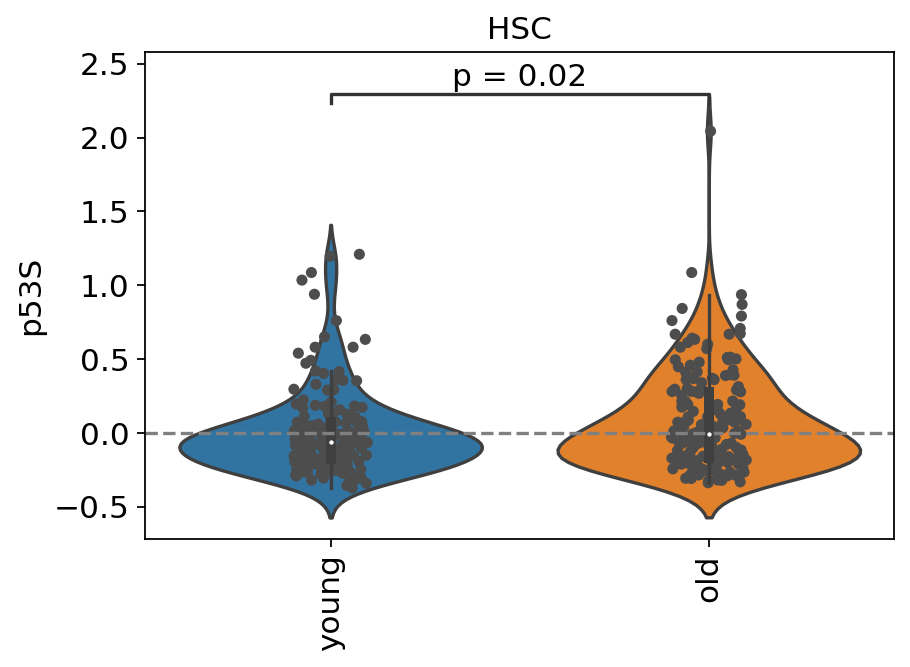

In [73]:
# Figure6C
from statannot import add_stat_annotation
fig, ax = plt.subplots(figsize=(6,4))
sns.violinplot(x='age', y='p53S', scale='width', data=GSE87631.obs, ax=ax)
sns.stripplot(x="age", y="p53S", data=GSE87631.obs, jitter=True, zorder=1, color=".3")
ax.set_xticklabels(labels=GSE87631.obs['age'].cat.categories,rotation=90)
ax.grid(False)
ax.set_xlabel('')
ax.set_title('HSC')
ax.axhline(y=0, linestyle="--", c='grey')
add_stat_annotation(ax, data=GSE87631.obs, x='age', y='p53S',
                        box_pairs=[('old', 'young')],
                        test='Mann-Whitney', text_format='simple', loc='inside', verbose=2)